In [1]:
import os

---
### Checking the connection
---

In [1]:
from Task1.utils import get_conn, extract_image_data,  get_relevant_data
import pandas as pd

In [2]:
conn = get_conn(service = "textract")

In [3]:
data = extract_image_data(client = conn)

In [4]:
texts = get_relevant_data(data = data, save_data = True)

In [1]:
data

NameError: name 'data' is not defined

In [4]:
texts = {}

for k, v in data.items():
    text = ""
    resp = data[k]
    for item in resp["Blocks"]:
        if item["BlockType"] == "LINE":
            text = text + " " + item["Text"]
    texts[k] = text

In [5]:
texts

{'image_1.jpg': " Dr. Anupama Joshi MS EN DOANS RCS Eng, Mch Cant ENT and Head VY HOSPITAL and Neck Cancer Surgeon We care for your Health or Anupama Joshi Name of consultant Date : 9/5/25 Patient Registration Done Time : Patient Vital Recorded Done Time : 12:30 pm. BP: 120/80 Temp.: 93.2°F Pulse : 70 m'm SPO2 : 99% 90 Pain in left ear- 2.3 days 015 - vesicles over lift Pima & overthe Chest Merpes zoster oticus. Plan 1 ACYCLOVIR Shingles 800MG 5 Times a day X 7 DAYS 2 SOFRADEX GINTMENT BDx 7 DAYS. Anothi en",
 'image_2.jpg': ' INSTITUTE OF FOUNDATION MEDICALSCHENCES & RESEARC MEDICALSCIENCES & RESEARC MEDICAL SCIENCES & RESEAR MEDICALSCIENCES & RESEAR MEDICALSCIENCES & BRESEAR MEDICAL SCIENCES & RESEAR Krishna Dist. A.P. 521 101. DEPARTMENT: Ortho predics-I OPERATION LIST THEATRE: 09--6.07-7. S.No. M.R. No. NAME OF THE PATIENT DATE: 18/11/23 SEX AGE DIAGNOSIS OPERATION SURGEON ANAES- REMARKS ) 12708728 U. SANKAR RAO THESIA M 45 Fracture of Both bone ORIF c plating 2, Dr.N. J,BB Rt Fore

In [6]:
comprehend_client = get_conn(service = "comprehendmedical")

In [7]:
txt = texts["image_1.jpg"]

In [8]:
txt

" Dr. Anupama Joshi MS EN DOANS RCS Eng, Mch Cant ENT and Head VY HOSPITAL and Neck Cancer Surgeon We care for your Health or Anupama Joshi Name of consultant Date : 9/5/25 Patient Registration Done Time : Patient Vital Recorded Done Time : 12:30 pm. BP: 120/80 Temp.: 93.2°F Pulse : 70 m'm SPO2 : 99% 90 Pain in left ear- 2.3 days 015 - vesicles over lift Pima & overthe Chest Merpes zoster oticus. Plan 1 ACYCLOVIR Shingles 800MG 5 Times a day X 7 DAYS 2 SOFRADEX GINTMENT BDx 7 DAYS. Anothi en"

In [9]:
response = comprehend_client.detect_entities_v2(Text = txt)

In [11]:
dataset = pd.DataFrame(response["Entities"])

In [27]:
dataset.drop(columns = ["Id", "BeginOffset", "EndOffset", "Score"], inplace = True)

In [34]:
dataset

,Text,Category,Type,Traits,Attributes
0,Anupama Joshi,PROTECTED_HEALTH_INFORMATION,NAME,[],NaN
1,Anupama Joshi,PROTECTED_HEALTH_INFORMATION,NAME,[],NaN
2,9/5/25,PROTECTED_HEALTH_INFORMATION,DATE,[],NaN
3,Vital,TEST_TREATMENT_PROCEDURE,TEST_NAME,[],NaN
4,BP,TEST_TREATMENT_PROCEDURE,TEST_NAME,[],"[{'Type': 'TEST_VALUE', 'Score': 0.95847845077..."
5,Temp,TEST_TREATMENT_PROCEDURE,TEST_NAME,[],"[{'Type': 'TEST_VALUE', 'Score': 0.86174064874..."
6,Pulse,TEST_TREATMENT_PROCEDURE,TEST_NAME,[],"[{'Type': 'TEST_VALUE', 'Score': 0.86174064874..."
7,SPO2,TEST_TREATMENT_PROCEDURE,TEST_NAME,[],"[{'Type': 'TEST_VALUE', 'Score': 0.84353899955..."
8,Pain,MEDICAL_CONDITION,DX_NAME,"[{'Name': 'SYMPTOM', 'Score': 0.98173028230667...","[{'Type': 'DIRECTION', 'Score': 0.821601390838..."
9,left ear,ANATOMY,SYSTEM_ORGAN_SITE,[],NaN


In [ ]:
for idx, row in dataset.dropna().iterrows():
    if row["Attributes"] is None:
        continue
    else:
        print(row["Attributes"])

[{'Type': 'TEST_VALUE', 'Score': 0.9584784507751465, 'RelationshipScore': 0.8219892978668213, 'RelationshipType': 'TEST_VALUE', 'Id': 4, 'BeginOffset': 254, 'EndOffset': 257, 'Text': '120', 'Category': 'TEST_TREATMENT_PROCEDURE', 'Traits': []}, {'Type': 'TEST_VALUE', 'Score': 0.9201511740684509, 'RelationshipScore': 0.8813977241516113, 'RelationshipType': 'TEST_VALUE', 'Id': 5, 'BeginOffset': 254, 'EndOffset': 260, 'Text': '120/80', 'Category': 'TEST_TREATMENT_PROCEDURE', 'Traits': []}]
[{'Type': 'TEST_VALUE', 'Score': 0.8617406487464905, 'RelationshipScore': 0.6270833611488342, 'RelationshipType': 'TEST_VALUE', 'Id': 7, 'BeginOffset': 268, 'EndOffset': 274, 'Text': '93.2°F', 'Category': 'TEST_TREATMENT_PROCEDURE', 'Traits': []}]
[{'Type': 'TEST_VALUE', 'Score': 0.8617406487464905, 'RelationshipScore': 0.8386837244033813, 'RelationshipType': 'TEST_VALUE', 'Id': 9, 'BeginOffset': 283, 'EndOffset': 285, 'Text': '70', 'Category': 'TEST_TREATMENT_PROCEDURE', 'Traits': []}, {'Type': 'TEST_U

In [47]:
import pandas as pd
import ast
import numpy as np

def summarize_attributes(attr_value):
    """
    Safely summarizes AWS Comprehend Medical attributes.
    Works even if attr_value is list, np.ndarray, or stringified JSON.
    """
    # Handle missing / NaN values
    if attr_value is None:
        return None
    if isinstance(attr_value, float) and np.isnan(attr_value):
        return None

    # If it's an array, take the first element
    if isinstance(attr_value, np.ndarray):
        if len(attr_value) == 0:
            return None
        attr_value = attr_value[0]

    # Convert from string to list if needed
    if isinstance(attr_value, str):
        try:
            attr_value = ast.literal_eval(attr_value)
        except Exception:
            return None

    # If not a list, ignore
    if not isinstance(attr_value, list):
        return None

    # Build summary
    parts = []
    for a in attr_value:
        if not isinstance(a, dict):
            continue
        t = a.get("Type")
        txt = a.get("Text")
        if t and txt:
            parts.append(f"{t}: {txt}")

    return " | ".join(parts) if parts else None


In [48]:
dataset["AttributeSummary"] = dataset["Attributes"].apply(summarize_attributes)

# View first few combined summaries
for summary in dataset["AttributeSummary"].dropna():
    print(summary)


TEST_VALUE: 120 | TEST_VALUE: 120/80
TEST_VALUE: 93.2°F
TEST_VALUE: 70 | TEST_UNIT: m'm
TEST_VALUE: 99 | TEST_UNIT: % | TEST_VALUE: 90
DIRECTION: left | SYSTEM_ORGAN_SITE: left ear
DX_NAME: Pain
SYSTEM_ORGAN_SITE: vesicles
SYSTEM_ORGAN_SITE: overthe Chest
DOSAGE: 800MG | FREQUENCY: 5 Times a day | DURATION: X 7 DAYS
FORM: GINTMENT | DURATION: 7 DAYS


In [51]:
dataset["AttributeSummary"] = dataset["Attributes"].apply(summarize_attributes)

# Preview some rows
dataset[["Text", "AttributeSummary"]]


,Text,AttributeSummary
0,Anupama Joshi,None
1,Anupama Joshi,None
2,9/5/25,None
3,Vital,None
4,BP,TEST_VALUE: 120 | TEST_VALUE: 120/80
5,Temp,TEST_VALUE: 93.2°F
6,Pulse,TEST_VALUE: 70 | TEST_UNIT: m'm
7,SPO2,TEST_VALUE: 99 | TEST_UNIT: % | TEST_VALUE: 90
8,Pain,DIRECTION: left | SYSTEM_ORGAN_SITE: left ear
9,left ear,None


In [7]:
comp_text = {}

In [9]:
for k, v in texts.items():
    response = comprehend_client.detect_entities(Text = v, LanguageCode = "en")
    comp_text[k] = response

In [15]:
dataframe_text = {}

In [ ]:
for k, v in comp_text.items():
    dataframe_text[k] = pd.DataFrame

In [19]:
dataframe_text["image_1.jpg"]["text"][0]

{'Entities': [{'Score': 0.7531594038009644,
   'Type': 'PERSON',
   'Text': 'Dr.',
   'BeginOffset': 1,
   'EndOffset': 4},
  {'Score': 0.9974682927131653,
   'Type': 'PERSON',
   'Text': 'Anupama Joshi',
   'BeginOffset': 5,
   'EndOffset': 18},
  {'Score': 0.9981797337532043,
   'Type': 'PERSON',
   'Text': 'Anupama Joshi',
   'BeginOffset': 122,
   'EndOffset': 135},
  {'Score': 0.9944260120391846,
   'Type': 'DATE',
   'Text': '9/5/25',
   'BeginOffset': 162,
   'EndOffset': 168},
  {'Score': 0.9915990233421326,
   'Type': 'DATE',
   'Text': '12:30 pm',
   'BeginOffset': 237,
   'EndOffset': 245},
  {'Score': 0.9383981227874756,
   'Type': 'QUANTITY',
   'Text': '120/80',
   'BeginOffset': 251,
   'EndOffset': 257},
  {'Score': 0.9821736812591553,
   'Type': 'QUANTITY',
   'Text': '93.2',
   'BeginOffset': 265,
   'EndOffset': 269},
  {'Score': 0.9882451295852661,
   'Type': 'QUANTITY',
   'Text': "70 m'm",
   'BeginOffset': 278,
   'EndOffset': 284},
  {'Score': 0.9948394298553467

In [14]:
with open("data/image_1.jpg", "rb") as image:
    img = bytearray(image.read())

In [18]:
response = conn.analyze_document(Document = {"Bytes": img}, FeatureTypes = ["TABLES", "FORMS"])

In [20]:
response["BlockType"] == "LINE"

KeyError: 'BlockType'

---
### Plotting all the images
---

In [3]:
from PIL import Image
import matplotlib.pyplot as plt

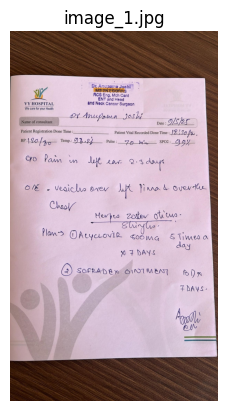

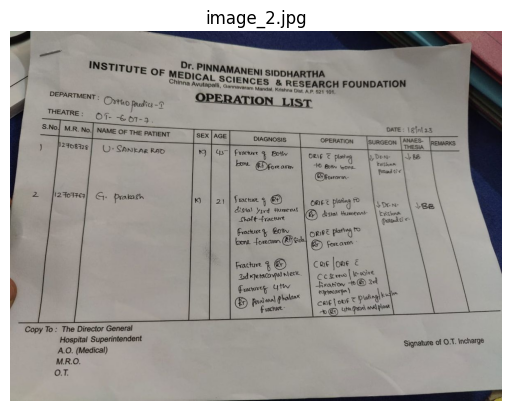

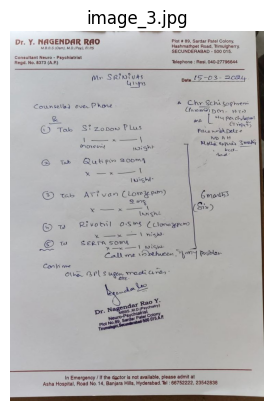

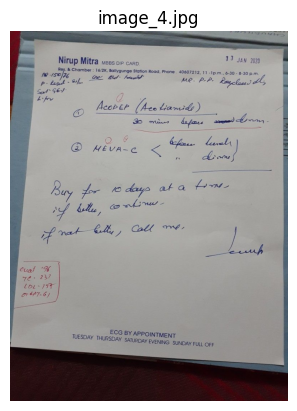

In [4]:
for img_name in os.listdir("data"):
    if img_name.lower().endswith((".png", ".jpg", ".jpeg")):
        img_path = os.path.join("data", img_name)
        image = Image.open(img_path)

        plt.imshow(image)
        plt.title(img_name)
        plt.axis("off")
        plt.show()

### Check Extraction

In [1]:
from Task1.utils import check_existing_extractions

In [2]:
check_existing_extractions()

{'to_process': [],
 'already_processed': ['image_1.jpg',
  'image_2.jpg',
  'image_3.jpg',
  'image_4.jpg']}

### Textract Pipeline

In [1]:
from Task1.textract_pipeline import TextractPipeline
from Task1.utils import extract_medical_entities, get_conn

In [2]:
text_pipeline = TextractPipeline()

In [3]:
data = text_pipeline.extract_data()

No new images to process.


In [4]:
data

{'image_1.jpg': "Dr. Anupama Joshi MS EN DOANS RCS Eng, Mch Cant ENT and Head VY HOSPITAL and Neck Cancer Surgeon We care for your Health or Anupama Joshi Name of consultant Date : 9/5/25 Patient Registration Done Time : Patient Vital Recorded Done Time : 12:30 pm. BP: 120/80 Temp.: 93.2°F Pulse : 70 m'm SPO2 : 99% 90 Pain in left ear- 2.3 days 015 - vesicles over lift Pima & overthe Chest Merpes zoster oticus. Plan 1 ACYCLOVIR Shingles 800MG 5 Times a day X 7 DAYS 2 SOFRADEX GINTMENT BDx 7 DAYS. Anothi en",
 'image_2.jpg': 'INSTITUTE OF FOUNDATION MEDICALSCHENCES & RESEARC MEDICALSCIENCES & RESEARC MEDICAL SCIENCES & RESEAR MEDICALSCIENCES & RESEAR MEDICALSCIENCES & BRESEAR MEDICAL SCIENCES & RESEAR Krishna Dist. A.P. 521 101. DEPARTMENT: Ortho predics-I OPERATION LIST THEATRE: 09--6.07-7. S.No. M.R. No. NAME OF THE PATIENT DATE: 18/11/23 SEX AGE DIAGNOSIS OPERATION SURGEON ANAES- REMARKS ) 12708728 U. SANKAR RAO THESIA M 45 Fracture of Both bone ORIF c plating 2, Dr.N. J,BB Rt Forear

In [5]:
data = extract_medical_entities(get_conn("comprehendmedical"), text_data = data, save_data = True)

Processed: image_1.jpg
Processed: image_2.jpg
Processed: image_4.jpg
Processed: image_3.jpg


In [1]:
from Task1.main import main

In [2]:
main()

No new images to process.
No new comprehend run needed.
[]
💾 Saved: data\processed_medical_data\image_1.jpg_summary.csv
Processed image_1.jpg: 21 entities
💾 Saved: data\processed_medical_data\image_2.jpg_summary.csv
Processed image_2.jpg: 45 entities
💾 Saved: data\processed_medical_data\image_4.jpg_summary.csv
Processed image_4.jpg: 16 entities
💾 Saved: data\processed_medical_data\image_3.jpg_summary.csv
Processed image_3.jpg: 33 entities


In [1]:
from Task1.utils import check_existing_comprehend

In [5]:
check_existing_comprehend()

{'to_analyze': ['image_3.jpg'],
 'already_analyzed': ['image_4.jpg', 'image_2.jpg', 'image_1.jpg'],
 'texts_to_analyze': {'image_3.jpg': "Dr. Y. NAGENDAR RAO Plot # 89, Sardar Patel Colony, M.B.B.S (Osm), M.D. (Psy), FI.P.S Hashmathpet Road, Trimulgherry, SECUNDERABAD 500 015. Consultant Neuro Psychiatrist Regd. No. 8373 (A.P.) Telephone : Resi. 040-27796644 Mr SRiNiVAS Date 15-03-2024 41yrs Counselled over Phone A Chr. Schizophremi (Paranna) DM- HTN Rx are H4 perchdement Tab SiZODON PLus (Tright) 1 parent Dels+ 1 1 ND AH X morrani Mothe experes 3math 1Night bed- sad' 2 Tab Qutipin 200mg \\ X X 1Night. 3 Tab ATivan (Lorazepam) 6marths 2 2mg X X (Six) lNight s Td Rivotril 0.5mg (cloncyepam) X X \\ night 5 Td SERTA 50mg X 1 Night Callme inbetween ifany problem Continue Olha BPl S usen medicines. Agendales Dr. Rao Y. the In Emergency / If the doctor is not available, please admit at Asha Hospital, Road No. 14, Banjara Hills, Hyderabad. Tel : 66752222, 23542838"}}

### Comprehend Pipeline

In [5]:
from Task1.comprehend_pipeline import ComprehendPipeline

In [6]:
pipeline = ComprehendPipeline()

In [7]:
data_dict = pipeline.extract_info(data_dict = data)

No new comprehend run needed.


In [8]:
data_dict

In [9]:
from pathlib import Path
from Task1.utils import open_file

In [10]:
comprehend_data = open_file(file_path = Path("data/processed_medical/processed_entities.json"))

In [11]:
comprehend_data

{'image_1.jpg': {'Entities': [{'Id': 35,
    'BeginOffset': 4,
    'EndOffset': 17,
    'Score': 0.9995217323303223,
    'Text': 'Anupama Joshi',
    'Category': 'PROTECTED_HEALTH_INFORMATION',
    'Type': 'NAME',
    'Traits': []},
   {'Id': 36,
    'BeginOffset': 124,
    'EndOffset': 137,
    'Score': 0.5159751772880554,
    'Text': 'Anupama Joshi',
    'Category': 'PROTECTED_HEALTH_INFORMATION',
    'Type': 'NAME',
    'Traits': []},
   {'Id': 37,
    'BeginOffset': 164,
    'EndOffset': 170,
    'Score': 0.9986488223075867,
    'Text': '9/5/25',
    'Category': 'PROTECTED_HEALTH_INFORMATION',
    'Type': 'DATE',
    'Traits': []},
   {'Id': 2,
    'BeginOffset': 212,
    'EndOffset': 217,
    'Score': 0.6603351831436157,
    'Text': 'Vital',
    'Category': 'TEST_TREATMENT_PROCEDURE',
    'Type': 'TEST_NAME',
    'Traits': []},
   {'Id': 3,
    'BeginOffset': 249,
    'EndOffset': 251,
    'Score': 0.7613970637321472,
    'Text': 'BP',
    'Category': 'TEST_TREATMENT_PROCEDURE',
 